In [97]:
import os
import os.path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
sns.set()

In [98]:
# Importing the dataset
datadir = "data/tidy_data"
data = os.path.join(datadir, "coded_injuries.csv")
df_injuries = pd.read_csv(data)

# Function for converting date format from American to ISO formatting
def date_coversion(date):
    date_object = datetime.strptime(date, '%m-%d-%Y')
    iso_format_date = date_object.strftime('%Y-%m-%d')
    return iso_format_date

# Changing date formatting
df_injuries.drop(columns = ["DateOfReturn", "ReportedDate"], inplace = True)
df_injuries["ProblemDate"] = df_injuries["ProblemDate"].str.replace("/", "-").apply(date_coversion)
df_injuries["ProblemDate"] = pd.to_datetime(df_injuries["ProblemDate"])

# Filling NA's
df_injuries["Side"] = df_injuries["Side"].fillna("Does Not Apply")

In [99]:
# Displaying the first 10 rows
df_injuries.head(10)

,Code,Organizations,ProblemDate,BodyPart,AffectedArea,Side,InjuryType,BodyPartName,CurrentStatus
0,FB64,Football,2023-08-10,Shoulder,Upper Extremity,Left,Other Shoulder Injury,NaN,Not Cleared
1,FB29,Football,2023-08-11,Thigh,Lower Extremity,Left,Strain,Hamstring (partial tear),Limited Activity
2,FB74,Football,2023-08-12,Elbow,Upper Extremity,Right,Entrapment Neuropathy (javelin elbow),NaN,Limited Activity
3,FB46,Football,2023-08-14,Thigh,Lower Extremity,Left,Strain,Hamstring (partial tear),Limited Activity
4,FB24,Football,2023-08-17,Knee,Lower Extremity,Right,Sprain,Anterior Cruciate Ligament,Not Cleared
5,VB13,Volleyball,2023-08-18,Wrist,Upper Extremity,Left,Triangular Fibrocartilage Complex Tear,NaN,Returned To Play As Tolerated
6,WSOC6,Womens Soccer,2023-08-18,Knee,Lower Extremity,Left,Other Knee Injury,NaN,Limited Activity
7,MSCO7,Men's Soccer,2023-08-19,Hip,Lower Extremity,Left,Strain,Psoas major,Returned To Play and Closed
8,FB16,Football,2023-08-20,Shoulder,Upper Extremity,Left,Subluxation,NaN,Returned To Play As Tolerated
9,SB2,Softball,2023-08-20,Shoulder,Upper Extremity,Right,Strain,General Rotator Cuff,Returned To Play As Tolerated


In [100]:
# Summary count for sport groups
sport_group = df_injuries.groupby("Organizations").count().filter(["Code"]).rename(columns = {"Code": "Count"}).sort_values(by = "Count", ascending = False).reset_index()

# Displaying the top 5 and 10 highest count
sport_top5 = sport_group.head(5)
sport_top10 = sport_group.head(10)

In [101]:
# Summary count for body part groups
body_part_group = df_injuries.groupby("BodyPart").count().filter(["Code"]).rename(columns = {"Code": "Count"}).sort_values(by = "Count", ascending = False).reset_index()

# Displaying the top 5 and 10 highest count
body_part_top5 = body_part_group.head(5)
body_part_top10 = body_part_group.head(10)

In [102]:
# Summary count for injury type groups
injury_group = df_injuries.groupby("InjuryType").count().filter(["Code"]).rename(columns = {"Code": "Count"}).sort_values(by = "Count", ascending = False).reset_index()

# Displaying the top 5 highest count
injury_top5 = injury_group.head(5)
injury_top10 = injury_group.head(10)

In [103]:
# Summary count for recovery status groups
recovery_group = df_injuries.groupby("CurrentStatus").count().filter(["Code"]).rename(columns = {"Code": "Count"}).sort_values(by = "Count", ascending = False).reset_index()

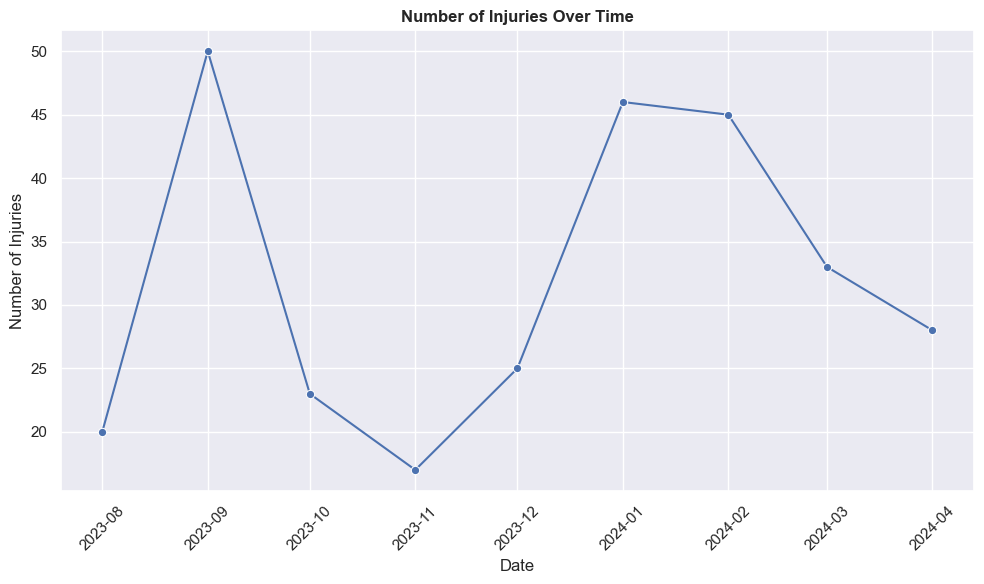

In [104]:
df_filtered = df_injuries.groupby([df_injuries['ProblemDate'].dt.to_period('M')]).size().reset_index(name='Count')

# Convert period to datetime for easier plotting
df_filtered['ProblemDate'] = df_filtered['ProblemDate'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='ProblemDate', y='Count', marker='o')

# Customize plot labels and title
plt.title('Number of Injuries Over Time', fontweight = "bold")
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

In [105]:
# Read the CSV file into a pandas DataFrame
data = os.path.join(datadir, "baseball_coded.csv")
df_baseball = pd.read_csv(data)

# Date conversion
df_baseball.sort_values(by='Date', inplace = True)
df_baseball = df_baseball[df_baseball['Date'].notna()]
df_baseball["Date"] = df_baseball["Date"].str.replace("/", "-").apply(date_coversion)
df_baseball["Date"] = pd.to_datetime(df_baseball["Date"], format='%Y-%m-%d')

In [106]:
# Filtering data for plotting
lower_injury_baseball = df_injuries[(df_injuries['Organizations'] == "Baseball") & 
                                 (df_injuries['AffectedArea'] == "Lower Extremity")]

thigh_injuries_jumps = df_baseball[df_baseball['Code'] == "BASEB1"]
desc = thigh_injuries_jumps.sort_values(by='Date')

In [107]:
lower_extremity_baseball_2024 = df_baseball[df_baseball['Code'].isin(["BASEB19", "BASEB33", "BASEB1"])]

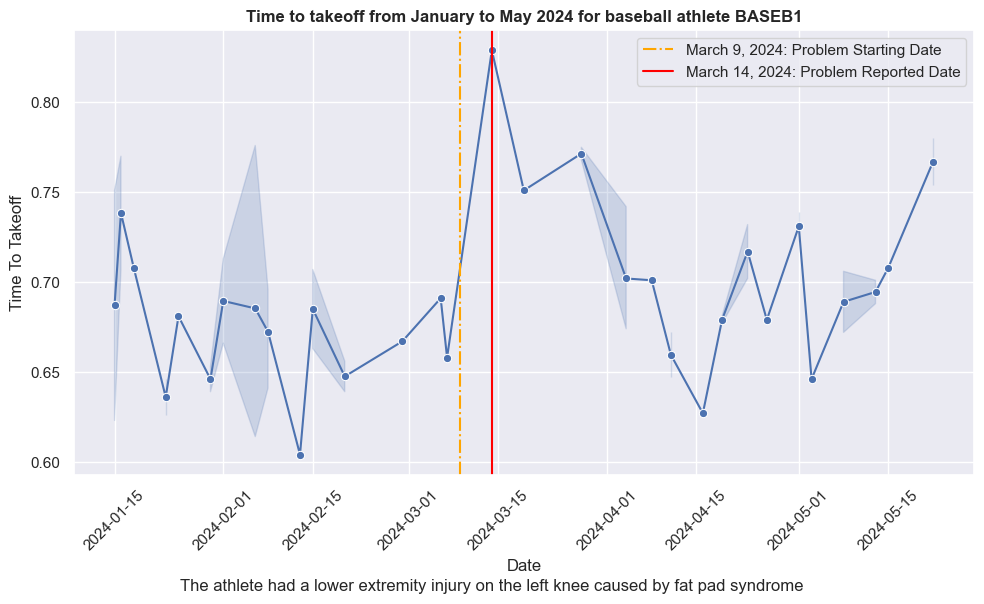

In [108]:
#Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Time To Takeoff', data=desc, marker = "o")
#sns.scatterplot(x='Date', y='Time To Takeoff', data=desc)
plt.title('Time to takeoff from January to May 2024 for baseball athlete BASEB1', fontweight = "bold")
plt.xticks(rotation = 45)

# Add vertical line for March 9th 2024 for problem starting date
plt.axvline(pd.to_datetime("2024-03-09"), color='orange', linestyle='-.', label='March 9, 2024: Problem Starting Date')

# Add vertical line for March 14th 2024 for reported date
plt.axvline(pd.to_datetime("2024-03-14"), color='red', linestyle='-', label='March 14, 2024: Problem Reported Date')

txt="The athlete had a lower extremity injury on the left knee caused by fat pad syndrome"
plt.figtext(0.5, 0.001, txt, wrap=True, horizontalalignment='center')

plt.legend()
plt.tight_layout()
plt.show()


In [109]:
df_injuries.loc[df_injuries["Code"] == "BASEB1"]

,Code,Organizations,ProblemDate,BodyPart,AffectedArea,Side,InjuryType,BodyPartName,CurrentStatus
250,BASEB1,Baseball,2024-03-09,Knee,Lower Extremity,Left,Fat Pad Syndrome,NaN,Returned To Play As Tolerated


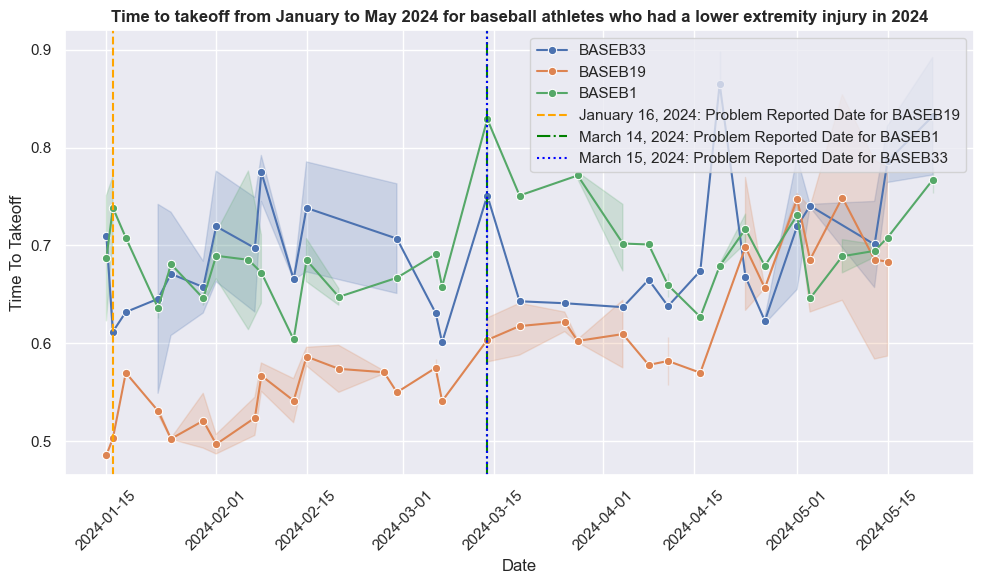

In [110]:
#Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Time To Takeoff', data=lower_extremity_baseball_2024, hue='Code', marker = "o")
plt.title('Time to takeoff from January to May 2024 for baseball athletes who had a lower extremity injury in 2024', fontweight = "bold")
plt.xticks(rotation = 45)

plt.axvline(pd.to_datetime("2024-01-16"), color='orange', linestyle='--', label='January 16, 2024: Problem Reported Date for BASEB19')
plt.axvline(pd.to_datetime("2024-03-14"), color='green', linestyle='-.', label='March 14, 2024: Problem Reported Date for BASEB1')
plt.axvline(pd.to_datetime("2024-03-14"), color='blue', linestyle=':', label='March 15, 2024: Problem Reported Date for BASEB33')

plt.legend()
plt.tight_layout()
plt.show()


In [111]:
sport_nonfiltered = df_injuries.groupby([df_injuries['ProblemDate'].dt.to_period('M'), 'Organizations']).size().reset_index(name='Count')
sport_pivot = sport_nonfiltered.pivot(index='ProblemDate', columns='Organizations', values='Count').reset_index()
sport_pivot['ProblemDate'] = sport_pivot['ProblemDate'].dt.to_timestamp()

In [112]:
sport_top5["Organizations"].to_list()

['Football',
 "Men's Swimming & Diving",
 'Baseball',
 "Women's Tennis",
 "Men's Track & Field"]

In [113]:
# Create figure
fig = go.Figure()

# Add traces for each line
traces = []
for col in sport_pivot.columns[1:]:
    traces.append(go.Scatter(x=sport_pivot['ProblemDate'], y=sport_pivot[col], name=col, visible='legendonly'))

fig = go.Figure(data = traces)

fig.update_layout(
    autosize=False,
    width=1600,
    height=900,
    title=dict(
        text = "<b>Monthly Count of Injuries by Sport from August 2023 to April 2024</b>",
        font = dict(
            size=30,
            family = "Helvetica")
    ),
    xaxis=dict(
        title="<i>Date</i>",
        range=[pd.to_datetime("2023-08-01"), pd.to_datetime("2024-04-01")],
        titlefont = dict(
                size=20,
                family = "Helvetica" 
            )
    ),
    yaxis=dict(
        title="<i>Count</i>",
        range = [0, 10],
        titlefont = dict(
                size=20,
                family = "Helvetica" 
            )
    ),
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            buttons=list([
                dict(
                    label="Toggle All",
                    visible = True,
                    args = [{'visible':True}],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Top 1",
                    visible = True,
                    args = [{'visible': True}, [i for i,x in enumerate(traces) if x.name in sport_top5["Organizations"][0]]],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Top 5",
                    visible = True,
                    args = [{'visible': True}, [i for i,x in enumerate(traces) if x.name in sport_top5["Organizations"].to_list()]],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Top 10",
                    visible = True,
                    args = [{'visible': True}, [i for i,x in enumerate(traces) if x.name in sport_top10["Organizations"].to_list()]],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Off",
                    visible = True,
                    args = [{'visible':'legendonly'}]
                ),
            ]),
            font = dict(
                size=15,
                family = "Helvetica" 
            )
        ),
    ])

fig.update_xaxes(title_font_family="Helvetica")
fig.update_yaxes(title_font_family="Helvetica")

fig.show()

fig.write_html("interactive_plots/sport_monthly.html")


In [114]:
body_part_nonfiltered = df_injuries.groupby([df_injuries['ProblemDate'].dt.to_period('M'), 'BodyPart']).size().reset_index(name='Count')
body_pivot = body_part_nonfiltered.pivot(index='ProblemDate', columns='BodyPart', values='Count').reset_index()
body_pivot['ProblemDate'] = body_pivot['ProblemDate'].dt.to_timestamp()

In [115]:
# Create figure
fig = go.Figure()

# Add traces for each line
traces = []
for col in body_pivot.columns[1:]:
    traces.append(go.Scatter(x=body_pivot['ProblemDate'], y=body_pivot[col], name=col, visible='legendonly'))

fig = go.Figure(data = traces)

fig.update_layout(
    autosize=False,
    width=1600,
    height=900,
    title=dict(
        text = "<b>Monthly Count of Injuries by Body Part from August 2023 to April 2024</b>",
        font = dict(
            size=30,
            family = "Helvetica")
    ),
    xaxis=dict(
        title="<i>Date</i>",
        range=[pd.to_datetime("2023-08-01"), pd.to_datetime("2024-04-01")],
        titlefont = dict(
                size=20,
                family = "Helvetica" 
            )
    ),
    yaxis=dict(
        title="<i>Count</i>",
        range = [0, 12],
        titlefont = dict(
                size=20,
                family = "Helvetica" 
            )
    ),
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            buttons=list([
                dict(
                    label="Toggle All",
                    visible = True,
                    args = [{'visible':True}],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Top 1",
                    visible = True,
                    args = [{'visible': True}, [i for i,x in enumerate(traces) if x.name in body_part_top5["BodyPart"][0]]],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Top 5",
                    visible = True,
                    args = [{'visible': True}, [i for i,x in enumerate(traces) if x.name in body_part_top5["BodyPart"].to_list()]],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Top 10",
                    visible = True,
                    args = [{'visible': True}, [i for i,x in enumerate(traces) if x.name in body_part_top10["BodyPart"].to_list()]],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Off",
                    visible = True,
                    args = [{'visible':'legendonly'}]
                ),
            ]),
            font = dict(
                size=15,
                family = "Helvetica" 
            )
        ),
    ])

fig.update_xaxes(title_font_family="Helvetica")
fig.update_yaxes(title_font_family="Helvetica")

fig.write_html("interactive_plots/body_monthly.html")

fig.show()

In [116]:
injury_nonfiltered = df_injuries.groupby([df_injuries['ProblemDate'].dt.to_period('M'), 'InjuryType']).size().reset_index(name='Count')
injury_pivot = injury_nonfiltered.pivot(index='ProblemDate', columns='InjuryType', values='Count').reset_index()
injury_pivot['ProblemDate'] = injury_pivot['ProblemDate'].dt.to_timestamp()

In [117]:
# Create figure
fig = go.Figure()

# Add traces for each line
traces = []
for col in injury_pivot.columns[1:]:
    traces.append(go.Scatter(x=injury_pivot['ProblemDate'], y=injury_pivot[col], name=col, visible='legendonly'))

fig = go.Figure(data = traces)

fig.update_layout(
    autosize=False,
    width=1600,
    height=900,
    title=dict(
        text = "<b>Monthly Count of Injuries by Injury Type from August 2023 to April 2024</b>",
        font = dict(
            size=30,
            family = "Helvetica")
    ),
    xaxis=dict(
        title="<i>Date</i>",
        range=[pd.to_datetime("2023-08-01"), pd.to_datetime("2024-04-01")],
        titlefont = dict(
                size=20,
                family = "Helvetica" 
            )
    ),
    yaxis=dict(
        title="<i>Count</i>",
        range = [0, 20],
        titlefont = dict(
                size=20,
                family = "Helvetica" 
            )
    ),
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            buttons=list([
                dict(
                    label="Toggle All",
                    visible = True,
                    args = [{'visible':True}],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Top 1",
                    visible = True,
                    args = [{'visible': True}, [i for i,x in enumerate(traces) if x.name in injury_top5["InjuryType"][0]]],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Top 5",
                    visible = True,
                    args = [{'visible': True}, [i for i,x in enumerate(traces) if x.name in injury_top5["InjuryType"].to_list()]],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Top 10",
                    visible = True,
                    args = [{'visible': True}, [i for i,x in enumerate(traces) if x.name in injury_top10["InjuryType"].to_list()]],
                    args2 = [{'visible':'legendonly'}]
                ),
                dict(
                    label="Toggle Off",
                    visible = True,
                    args = [{'visible':'legendonly'}]
                ),
            ]),
            font = dict(
                size=15,
                family = "Helvetica" 
            )
        ),
    ])

fig.update_xaxes(title_font_family="Helvetica")
fig.update_yaxes(title_font_family="Helvetica")

fig.show()

fig.write_html("interactive_plots/injury_monthly.html")